# **Property Sales Exploratory Data Analysis**

**Analyst:** Noah Oyugi

This **Sales Analysis** work focuses on understanding the value, sale amount and volume of properties in the Connecticut State Real Estate Market.

This Analysis is tailored to investors and future property owners in Connecticut to make informed decision when buying, expanding, collaborating or allocating resources for real estate properties. 

The main objective of this analysis is to Explore the sales value and volume over the 2001-2021 listing period.

> NOTE: property type analysis is not included in this analysis

In [37]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
from scipy import stats

In [38]:
params = {
    "lines.linewidth": 1.5,
    "axes.labelsize": 14,
    "axes.titlesize": 18,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "axes.spines.right": False,
    "axes.spines.top": False,
}
sns.set_theme(context = 'paper', style='white', palette='deep', rc=params)
plt.rcParams['font.family']='Times New Roman'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (15,6)
pd.options.display.float_format = "{:,.2f}".format

## **Data Loading and Cleaning**

In [39]:
sales_df = (pd
            .read_csv('sales_data.csv', index_col='serial_number', parse_dates=['date_recorded'])
            .assign(
                #sale_z_score = lambda x: x.sale_amount\
                 #   .sub(x.sale_amount.mean())\
                   #     .div(x.sale_amount.std())\
                    #        .abs().astype('int32')
                sale_z_score = lambda x: stats.zscore(x.sale_amount).abs()
                )
            .query(
                'town != "***Unknown***" and '\
                    'sale_amount > 0 and '\
                        'sales_ratio < 1 and '\
                            'assessed_value > 0 and '\
                                'sale_z_score <= 3'
                        )
            .sort_index()
            )
sales_df.head()

,list_year,date_recorded,town,address,assessed_value,sale_amount,sales_ratio,sale_z_score
serial_number,,,,,,,,
21,2021,2021-10-05,Marlborough,323 Jones Hollow Rd,201240,370000,0.54,0.01
81,2008,2008-10-01,Meriden,286 Edgemark Acres,77840,128000,0.61,0.09
82,2008,2008-10-01,Meriden,17 Sunrise Hill,144210,171000,0.84,0.08
83,2008,2008-10-01,Meriden,33 Hidden Pines Circle,187780,290000,0.65,0.04
84,2008,2008-10-01,Meriden,24 Pilgrim Lane,166770,185000,0.90,0.07


In [40]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 907908 entries, 21 to 2000500023
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   list_year       907908 non-null  int64         
 1   date_recorded   907908 non-null  datetime64[ns]
 2   town            907908 non-null  object        
 3   address         907908 non-null  object        
 4   assessed_value  907908 non-null  int64         
 5   sale_amount     907908 non-null  int64         
 6   sales_ratio     907908 non-null  float64       
 7   sale_z_score    907908 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 62.3+ MB


## **Data Summary**

In [41]:
sales_df[['assessed_value','sale_amount']].describe().T

,count,mean,std,min,25%,50%,75%,max
assessed_value,"907,908.00","214,482.42","307,041.50",1.00,"89,110.00","140,690.00","226,900.00","8,564,900.00"
sale_amount,"907,908.00","379,271.11","526,284.20",300.00,"165,000.00","250,000.00","392,000.00","8,881,439.00"


In [42]:
highest_sale_property = sales_df.loc[sales_df.sale_amount.idxmax()]
highest_sale_property

list_year                        2021
date_recorded     2022-07-28 00:00:00
town                         Cheshire
address              745 Highland Ave
assessed_value                1960000
sale_amount                   8881439
sales_ratio                      0.22
sale_z_score                     3.00
Name: 21000442, dtype: object

In [43]:
highest_sale_property = sales_df.loc[sales_df.sale_amount.idxmin()]
highest_sale_property.sort_values(by='sale_amount')

,list_year,date_recorded,town,address,assessed_value,sale_amount,sales_ratio,sale_z_score
serial_number,,,,,,,,
10083,2001,2002-08-01,Harwinton,Vale Passway,270,300,0.90,0.14
10083,2001,2002-02-22,Thompson,Laporte Rd,2100,5000,0.42,0.14
10083,2010,2010-11-16,Hartford,72-74 Van Block Av Unit 7C,8140,16855,0.48,0.13
10083,2001,2002-06-21,Canterbury,Willow Brook Ln,23100,33000,0.70,0.13
10083,2001,2001-12-03,Bethel,32 Wooster St,8150,36250,0.22,0.13
...,...,...,...,...,...,...,...,...
10083,2010,2011-03-02,Darien,28 Pleasant Street,610540,816000,0.75,0.15
10083,2010,2011-02-01,North Haven,1149 Ridge Road,571480,990000,0.58,0.21
10083,2001,2002-01-09,Wilton,160 Mather St,452130,1300000,0.35,0.32


## **Property Value and Sales Analysis**

### **_Average Property Value Per Town_**

In [44]:
mean_sales_amount_for_each_town = (sales_df
                                   .groupby('town')
                                   .agg(
                                       {
                                           'assessed_value':'mean'
                                       }
                                        )
                                   )

#### **(i) _Top 10 Towns with High-Value Property_**

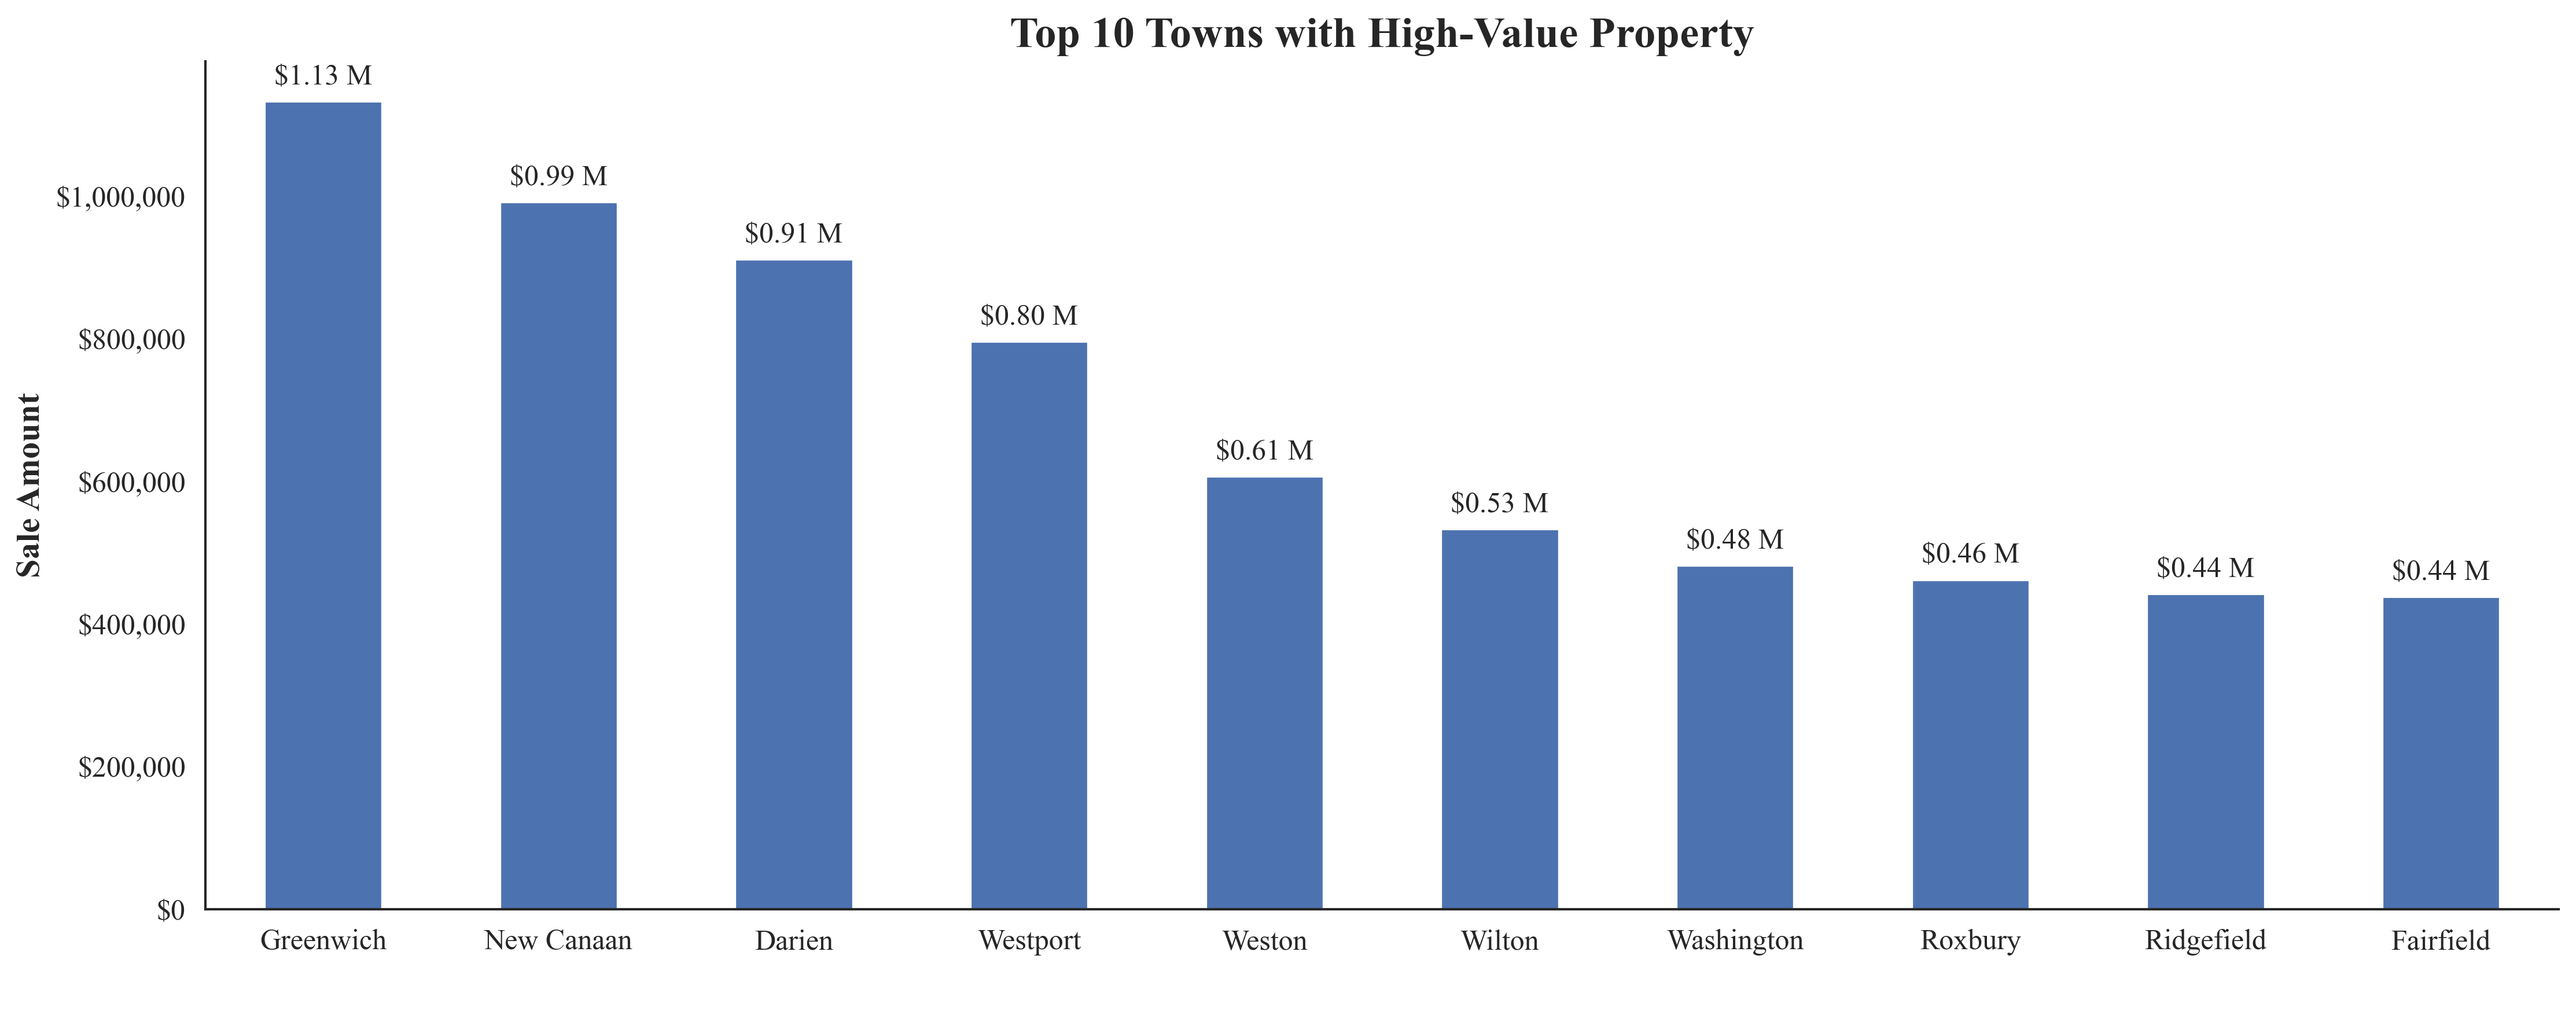

In [45]:
ax = (mean_sales_amount_for_each_town
      .nlargest(10,'assessed_value')['assessed_value']
      .plot(
          kind='bar', rot=0,
          xlabel = ' '
          )
      )
ax.set_title('Top 10 Towns with High-Value Property', 
             loc='center', fontweight='bold'
             )
ax.set_ylabel('Sale Amount', loc='center', fontweight='bold')
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}')) 
for p in ax.patches:
    ax.annotate(f'${p.get_height()/1e6:.2f} M',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')
plt.tight_layout();


#### **(ii) _Top 10 Towns with Low-Value Property_**

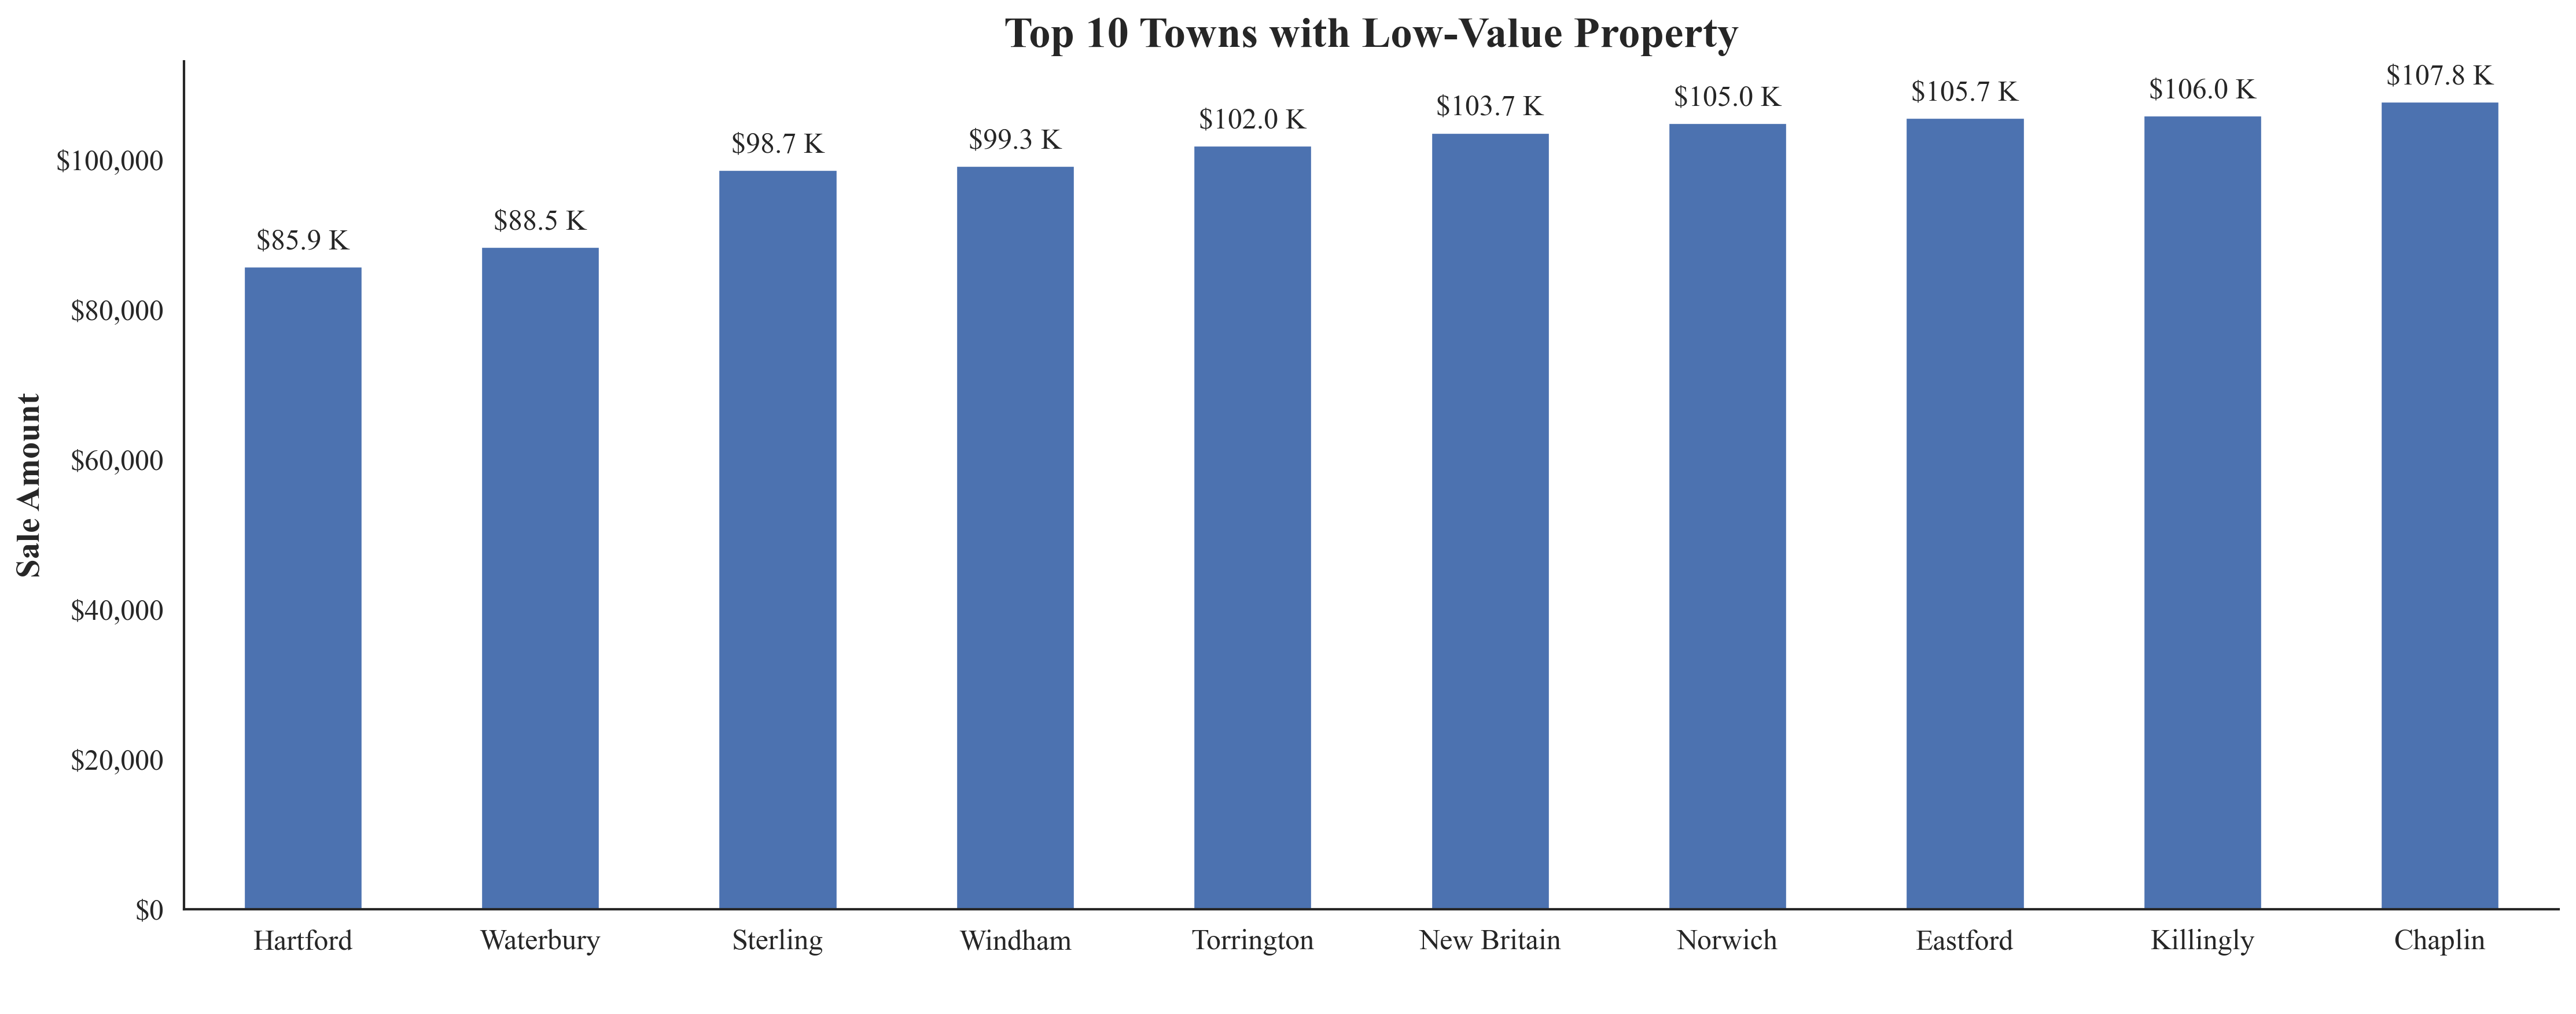

In [46]:
ax = (mean_sales_amount_for_each_town
      .nsmallest(10,'assessed_value')['assessed_value']
      .plot(
          kind='bar', rot=0,
          xlabel = ' '
          )
      )
ax.set_title('Top 10 Towns with Low-Value Property', 
             loc='center', fontweight='bold'
             )
ax.set_ylabel('Sale Amount', loc='center', fontweight='bold')
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}')) 
for p in ax.patches:
    ax.annotate(f'${p.get_height()/1e3:.1f} K',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')
plt.tight_layout();


## **Annual Average Sales Amount and Assessed Value Trend**

In [47]:
mean_sales_amount_for_each_year = (sales_df
                                   .groupby('list_year')
                                   .agg({'sale_amount': 'mean',
                                         'assessed_value': 'mean'})
                                   )

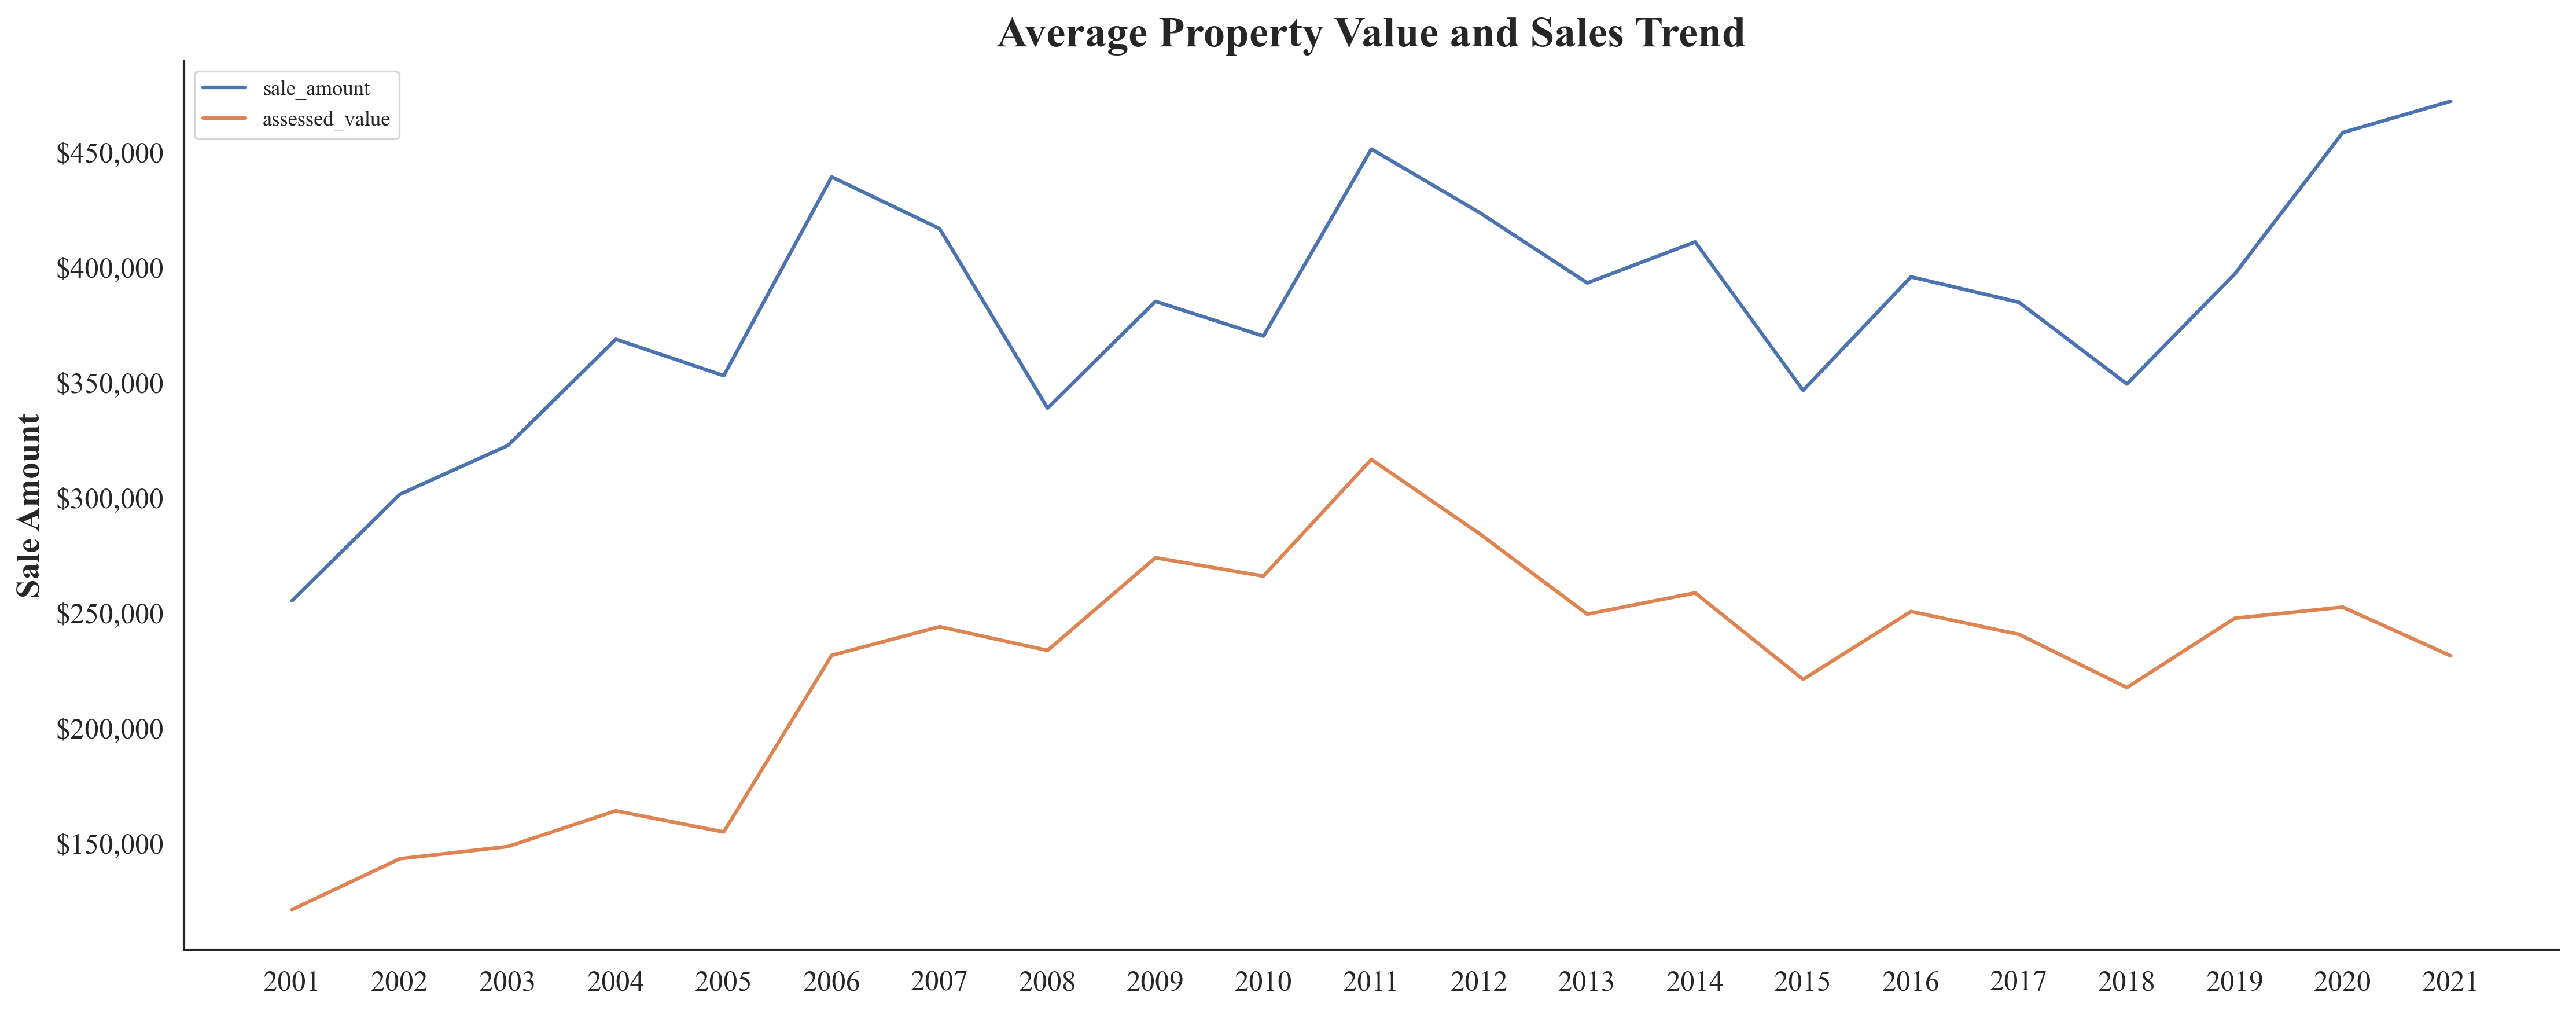

In [48]:
ax = mean_sales_amount_for_each_year['sale_amount'].plot(legend=True)
mean_sales_amount_for_each_year['assessed_value'].plot(legend=True)
ax.set_ylabel('Sale Amount', loc='center', fontweight='bold')
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.set_title('Average Property Value and Sales Trend', loc='center', fontweight='bold')
ax.set_xticks(range(2001, 2022))
ax.set_xlabel('')
plt.tight_layout();

## **Annual Sale Amount Summary**

In [49]:
annual_summary = (sales_df
                  .groupby('list_year')['sale_amount']
                  .agg(['mean','std','median','min','max'])
                  .round(2)
                  )
annual_summary

,mean,std,median,min,max
list_year,,,,,
2001,"255,356.24","320,741.61","175,087.00",300,8620000
2002,"301,628.17","419,955.73","196,500.00",975,8750000
2003,"322,792.87","438,556.91","217,000.00",1000,8688000
2004,"368,962.02","500,572.83","245,000.00",500,8850969
2005,"353,136.09","421,959.01","254,900.00",370,8750000
2006,"439,484.61","621,539.45","275,000.00",666,8650000
2007,"417,009.40","631,127.72","260,000.00",965,8750000
2008,"339,039.08","444,167.78","239,000.00",2500,8826000
2009,"385,416.96","531,843.74","249,000.00",2500,8800000


## **Property Volume Analysis**

### **(a) _Property Volume Per Town_**

In [50]:
property_volume_df = pd.DataFrame(sales_df['town'].value_counts())
property_volume_df = property_volume_df.rename(columns = {'count':'volume'})

#### **(i) _Top 10 Towns with highest Property Volume_**

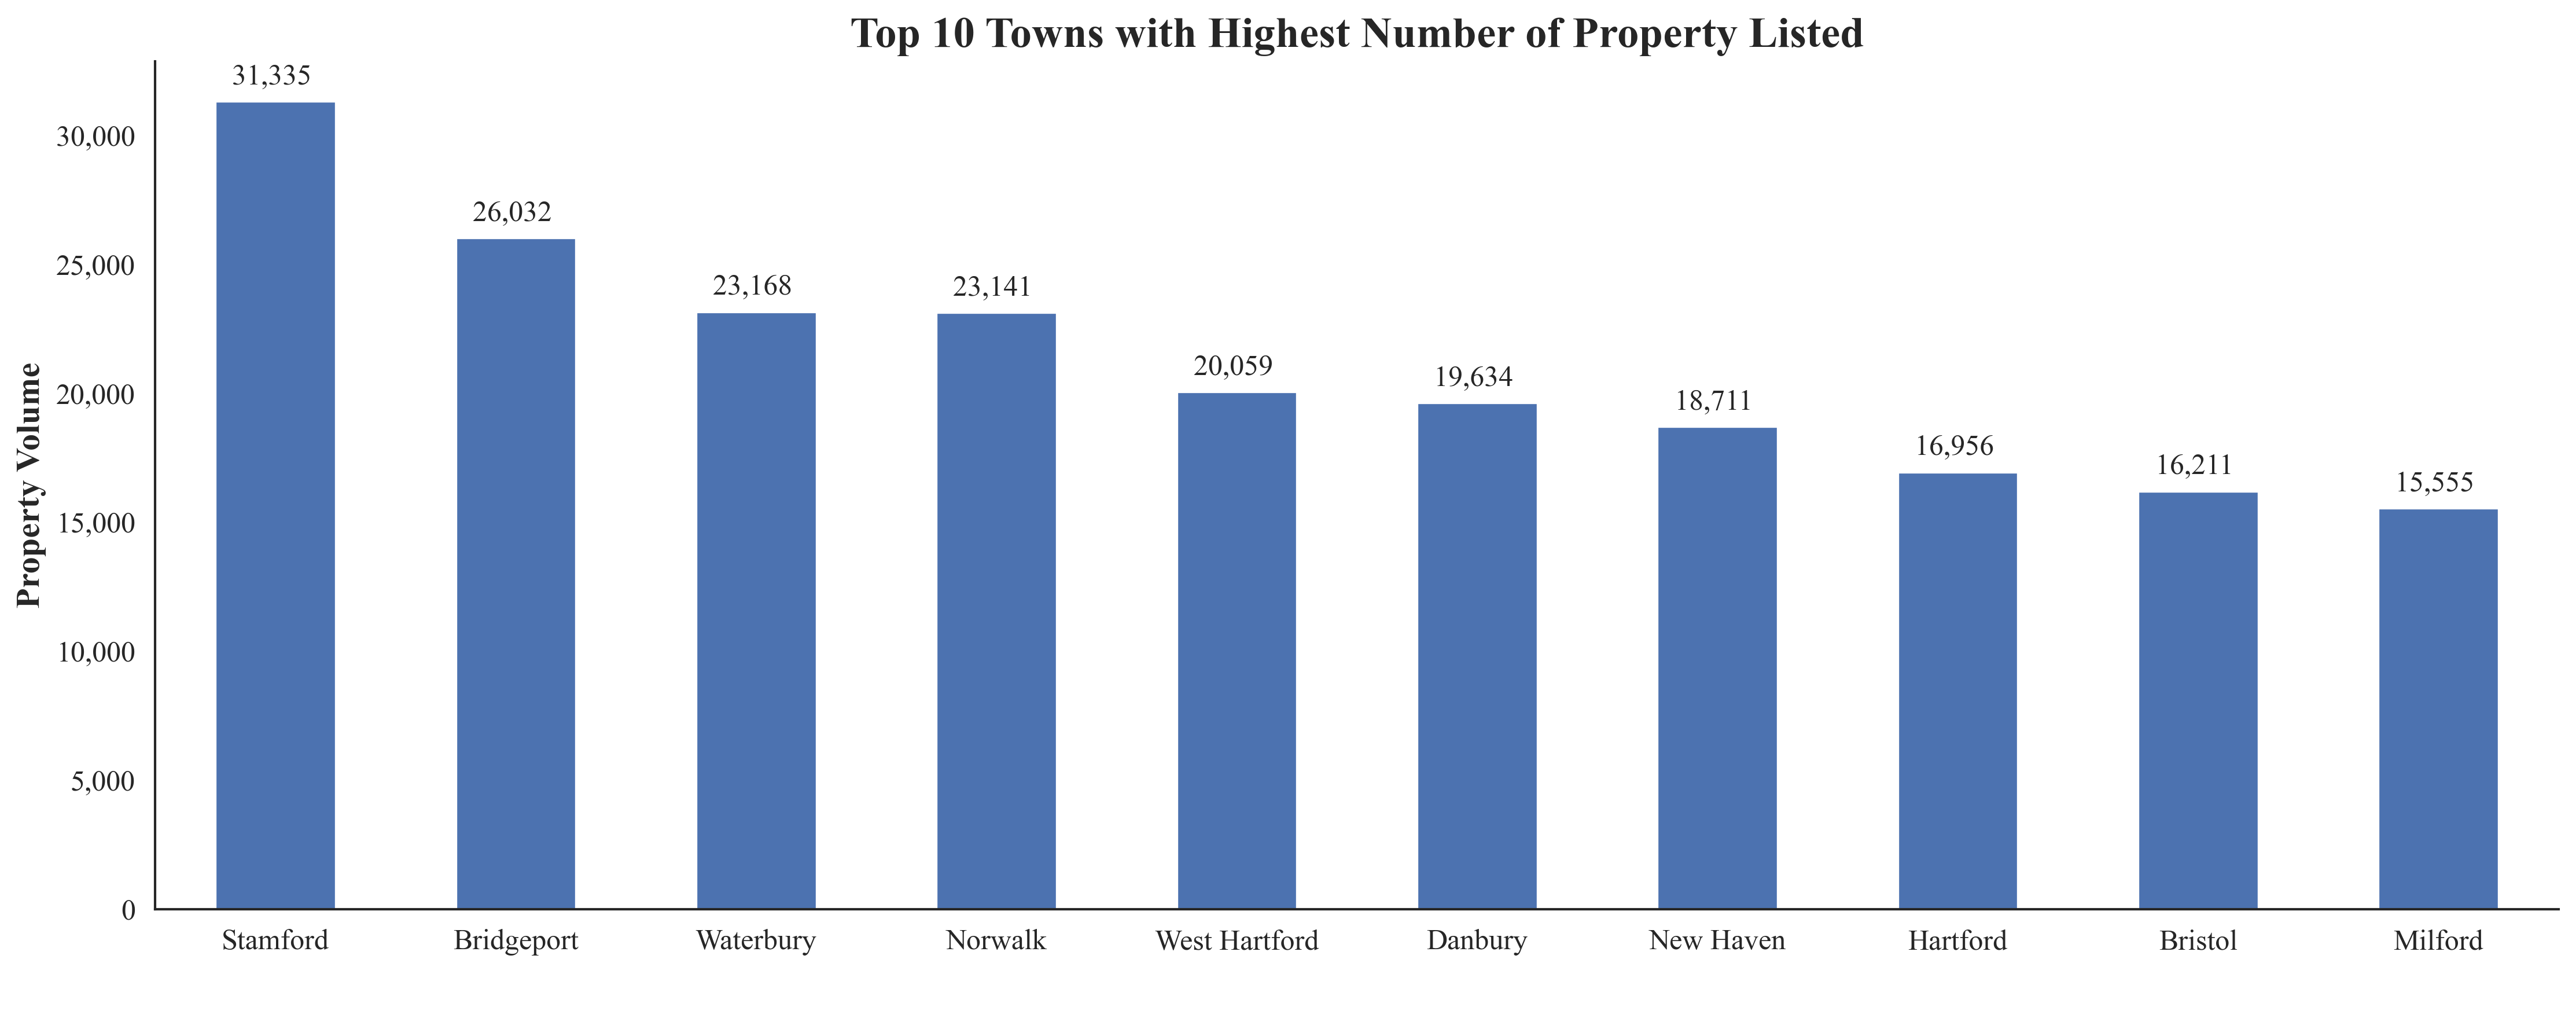

In [51]:
ax = (property_volume_df
      .nlargest(10,'volume')['volume']
      .plot(
          kind='bar', rot=0,
          xlabel = ' '
          )
      )
ax.set_title('Top 10 Towns with Highest Number of Property Listed', 
             loc='center', fontweight='bold'
             )
ax.set_ylabel('Property Volume', loc='center', fontweight='bold')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) 
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f} ',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')
plt.tight_layout();

#### **(ii) _Top 10 Towns with lowest Property Volume_**

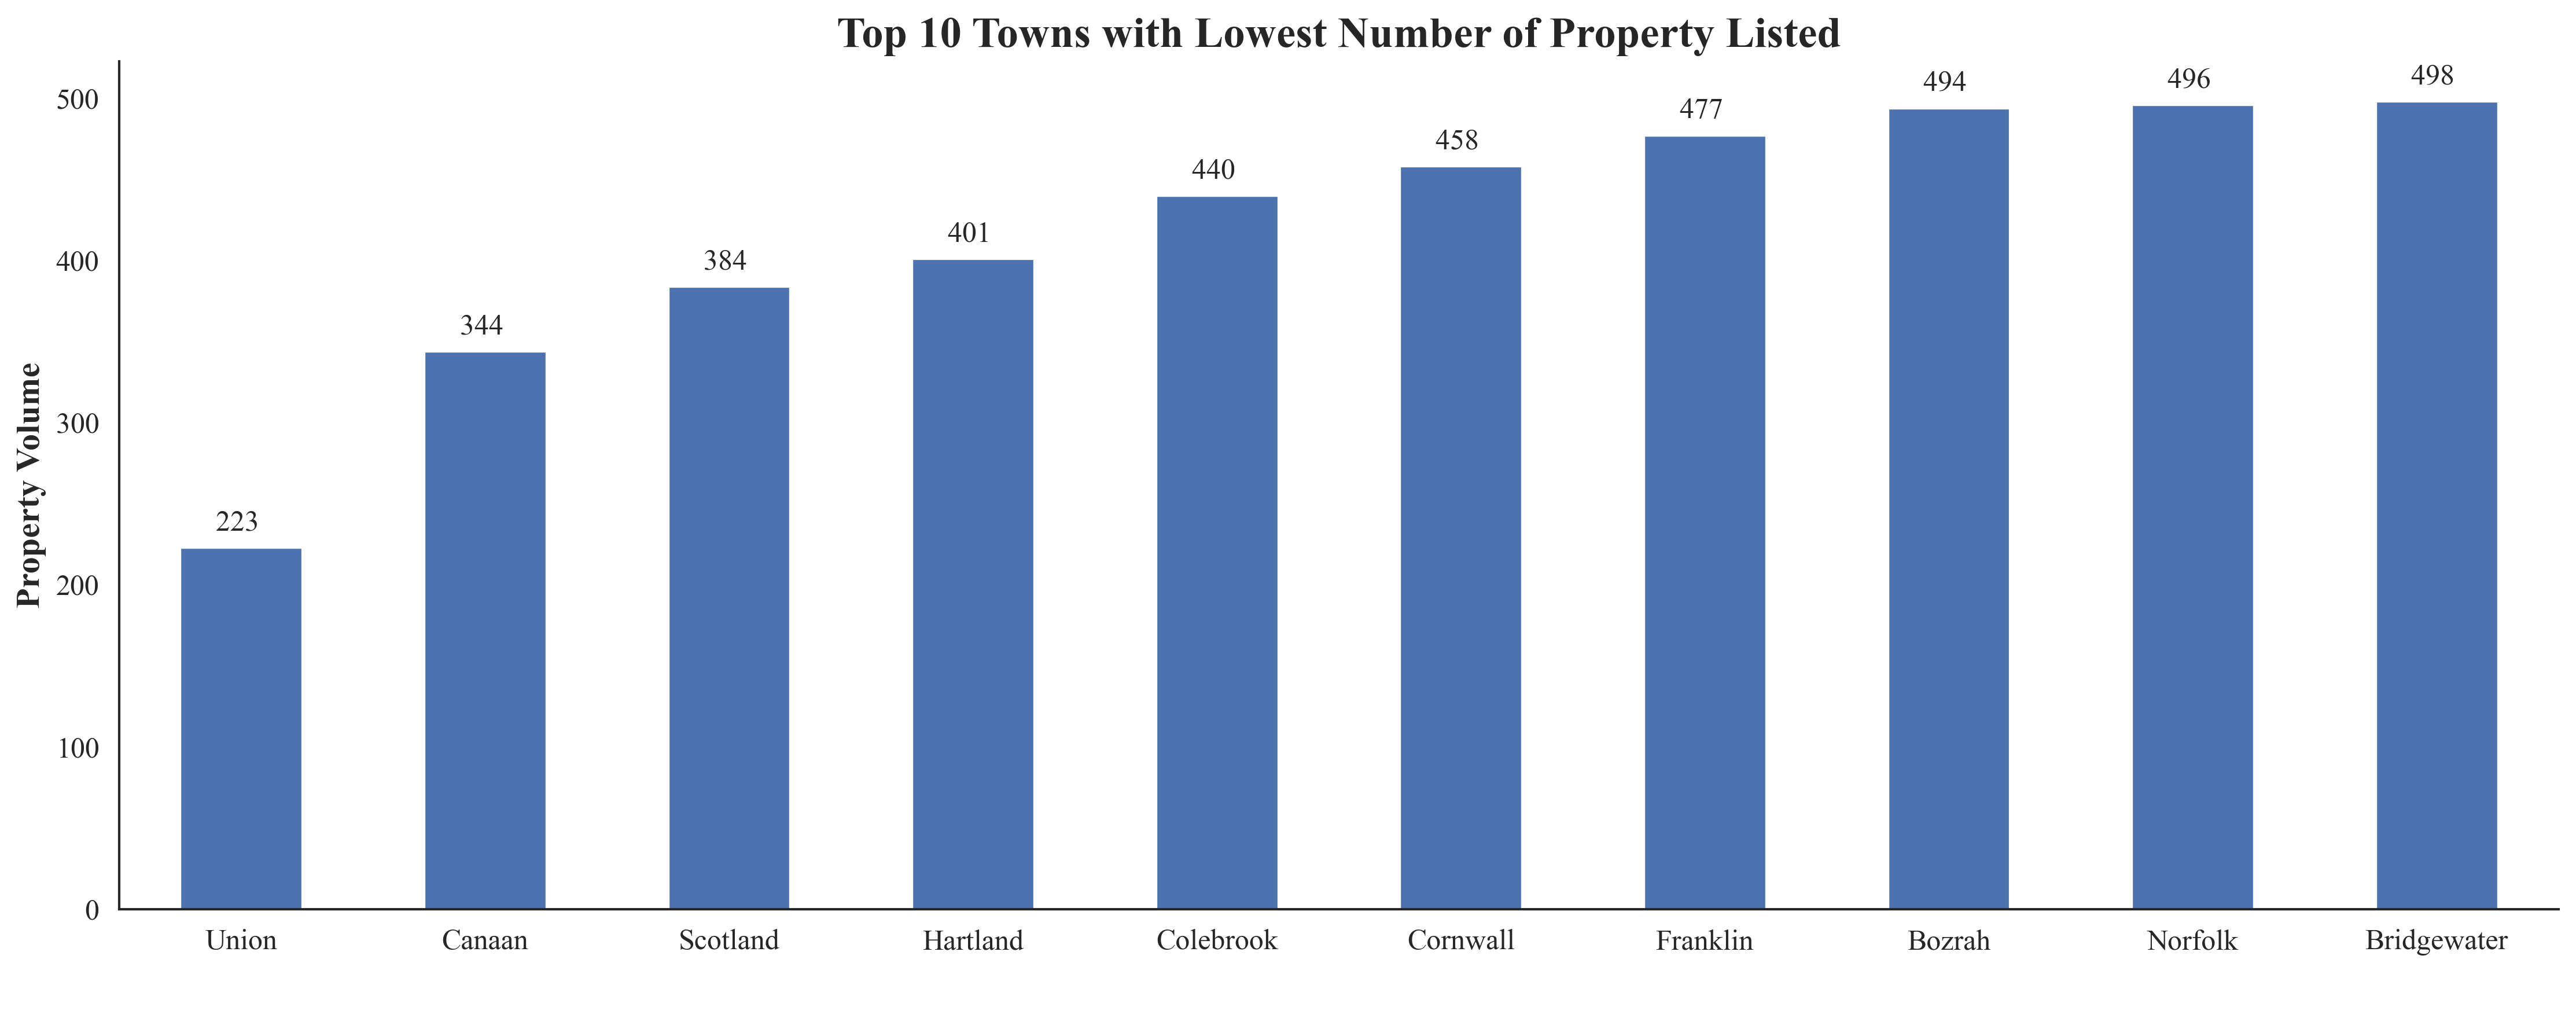

In [52]:
ax = (property_volume_df
      .nsmallest(10,'volume')['volume']
      .plot(
          kind='bar', rot=0,
          xlabel = ' '
          )
      )
ax.set_title('Top 10 Towns with Lowest Number of Property Listed', 
             loc='center', fontweight='bold'
             )
ax.set_ylabel('Property Volume', loc='center', fontweight='bold')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) 
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f} ',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')
plt.tight_layout();

### **_Property Volume Per Year_**

In [53]:
property_volume_per_year_df = pd.DataFrame(sales_df.groupby('list_year').size())
property_volume_per_year_df = property_volume_per_year_df.rename(columns = {'0':'volume'})

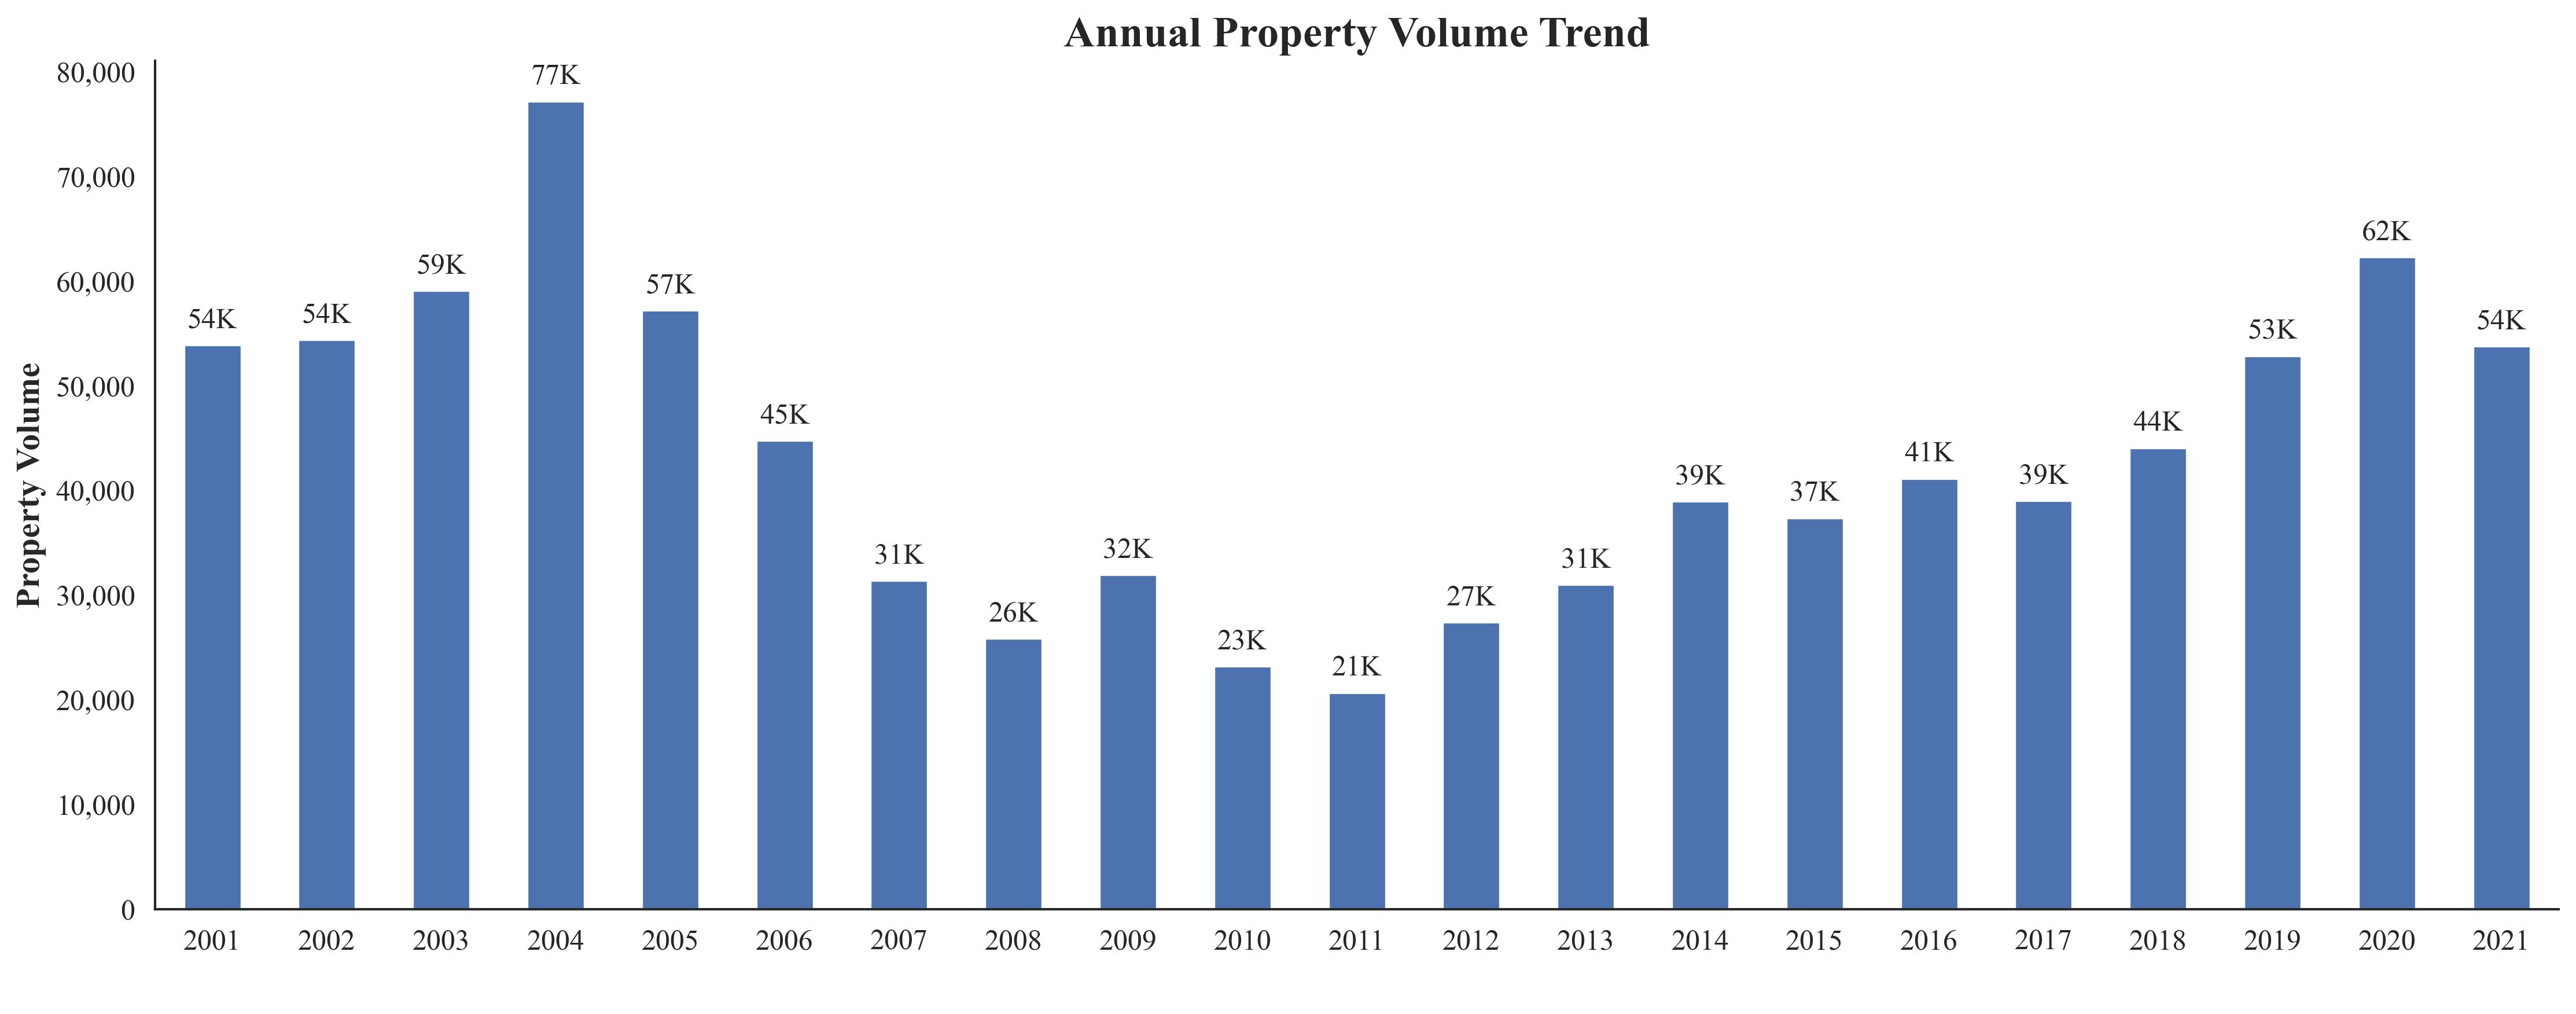

In [54]:
ax = (property_volume_per_year_df
      .plot(
          kind='bar', rot=0,
          xlabel = ' ', legend=False
          )
      )
ax.set_title('Annual Property Volume Trend', 
             loc='center', fontweight='bold'
             )
ax.set_ylabel('Property Volume', loc='center', fontweight='bold')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) 
for p in ax.patches:
    ax.annotate(f'{p.get_height()/1e3:,.0f}K',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), 
                textcoords='offset points')
plt.tight_layout();

# **Insights**

## **1. _Data Summary_**
              
### **_Sale Amount_**

  - The average Sale Amount for the period was **$379,271**
  - 50% of the listed properties were up for sale at the price of **$250,000**
  - The property that had the highest sale amount was listed in `2021`, it was located along `745 Highland Avenue` Cheshire Town, its assessed value was **$1,960,000** and sold for **$8,881,439**.
  - The property that had the lowest sale amount was listed in `2001`, it was located along `Vale Passway` Harwinton Town, its assessed value was **$ 270** and sold for **$300**.
  

## **2. _Property Value and Sales Analysis_**

### **_Average Property Value Per Town_**

   - **Greenwich Town** boasts of highly valued properties with an average of **$ 1.13 M** per property.
   - **Hartford Town** has the most low-valued properties with an average of **$ 85.9 K** per property.


## **3. _Annual Average Sales Amount and Assessed Value Trend_**

   The sale Amount and Assessed Value follow the same trend throughout the period - the sale amount is usually higher than the assessed value. With an evident smooth rise in price from **2001** to **2005**, an abrupt sharp increase in price is visible for the year **2005-2006** with a "troughy" drop in price during the **2008-2009** economic recession. The trend repeats itself, although at a slow pace from 2010 onwards.

## **4. _Property Volume Analysis_**

### **_Properties per town_**

   - **Stanford Town** tops in the number of real estate property listings with **31,335** properties.
   - **Union Town** is the town with the least number of real estate leastings with only **223** properties

### **_Properties Listings per year_**

The year **2004** recorded the highest number of listings with a total of **77K** properties. Followed closely by **2020** with **62K**.

The year 2011 recorded the lowest number of listings with a total of **21K**.

# **Recommendation and Conclusion**

## **_Recommendation_**

For investors looking at investing in the towns with the lowest number of listings or highest number of listings as well as high or low property value towns; should consider doing groundwork before putting their money into the development projects. This also applies to individuals who want to  own properties in those areas.

>For those considering costs when deciding whether to invest or buy a property; if the buyer or investor is a top earner/investor, the towns of **Greenwich, Darian, New Canaan, Westport, Weston, Wilton, Washington, Roxbury, Ridgefield and Fairfield** are recommended. 

>Else, the towns of **Hartford, Waterbury, Sterling, Windhum, Terrington, New Britain, Norwich, Eastford, Killingly and Chaplin** are recommended. 


## **_Conclusion_**
In total 907,908 properties were analyzed and insights generated with useful recommendation provided for both investors and property owners. 
The data was sufficiently dirty.

The next analysis will solely be based on the **property types**

Be ready to check it out.